# [Titanic](https://www.kaggle.com/c/titanic)- Who will survive?

- PassengerId: unique identifier of a passenger
- Pclass: Ticket class (1= 1st class, and so on)
- Name: Name of the passenger
- Sex: Male or female
- Age: Age in years
- SibSp: # of siblings
- Parch: # of parents
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of embarkation (where did they get onbaord)
            C = cherbourg, Q = Queenstown, S= Southampton
- Target class: Survived: 0/1 survived or no survival
***

1. Explore the features 
2. Apply feature engineering
3. Build models using code in src/
4. Evaluate the models
5. Interpret the results
6. Answer some questions

In [1]:
import pandas as pd # for loading and performing analysis on the dataset
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
titanic_dataset_train = pd.read_csv('../input/train.csv', delimiter=',')

In [3]:
titanic_dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_dataset_train.shape

(891, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ec5bcd0f0>,
      dtype=object)

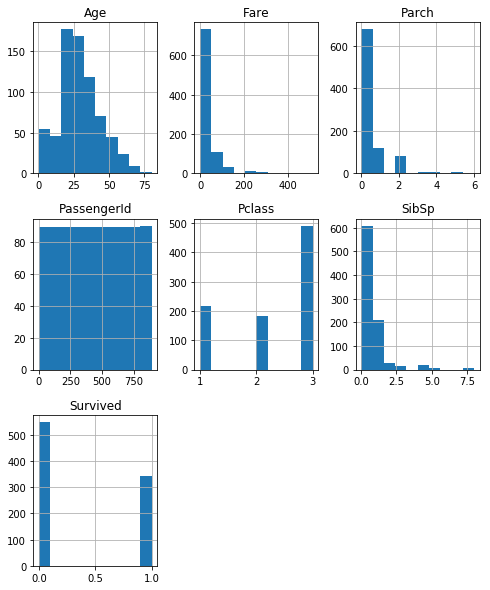

In [5]:
titanic_dataset_train.hist(figsize=(8,10))

In [17]:
print(titanic_dataset_train.groupby('Survived').groups)

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
            ...
            877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=549), 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
            ...
            865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
           dtype='int64', length=342)}


**How many people survived from each class**

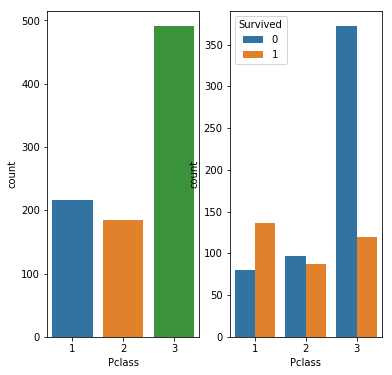

In [25]:
# TELLS US HOW MANY PASSENGERS SURVIVED FROM EACH CLASS
plt.figure(figsize=[6,12])
plt.subplot(211)          # PARAMETER: 211 INDICATES 2 ROWS, 1 COLUMN, 1ST PLOT
sns.countplot(x='Pclass',data=titanic_dataset_train)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived' ,data=titanic_dataset_train)